In [1]:
%matplotlib inline

import numpy as np
import pickle
import matplotlib.pyplot as plt
import glob
import os
from cycler import cycler
import time
import datetime

In [2]:
plt.rcParams['figure.autolayout'] = True
# plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [10., 5.]
plt.rc('axes', prop_cycle=(cycler('color', ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']) +
                           cycler('linestyle', ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':'])))

In [3]:
# basePath = 'data/walker'
basePath = 'data/walkerSlow'
# machines = [ #included suffix
#     # 'ibmq_5_yorktown',
#     # 'ibmq_athens',
#     'ibmq_bogota',
#     # 'ibmq_casablanca',
#     # 'ibmq_casablanca-bis',
#     'ibmq_lima',
#     # 'ibmq_santiago',
#     'ibmq_quito',
#     'ibmq_rome',
#     'ibmq_belem',
# ]

#Take all machines present in folder
machines = sorted(list(set([os.path.basename(f)[:-9] for f in glob.glob(os.path.join(basePath, "*-" + "[0-9]"*6 + ".p"))])))

limit = (0,-1)

In [4]:
dates = {}
relative = {}
for m in machines:
    currDates = []
    currRelative = []
    # for filename in sorted(glob.glob(os.path.join(basePath, '{}*'.format(m))), key=lambda f:int(f.replace(os.path.join(basePath, '{}-'.format(m)), '').replace('.p', ''))): #all the files related to m, sorted by the int index (with correct progressive)
    for filename in sorted(glob.glob(os.path.join(basePath, '{}-'.format(m)+('[0-9]'*6)+'.p')))[limit[0]:limit[1]]:
        # print("Read ", filename)
        results = pickle.load(open(filename, 'rb'))
        currDates.append(results['date'])
        # currRelative.append(datetime.datetime.fromtimestamp((currDates[-1] - currDates[0]).total_seconds()))
        # currRelative.append((currDates[-1] - currDates[0]).total_seconds())
        currRelative.append((currDates[-1] - currDates[0]).total_seconds()/60./60.)
    dates[m] = currDates
    relative[m] = currRelative

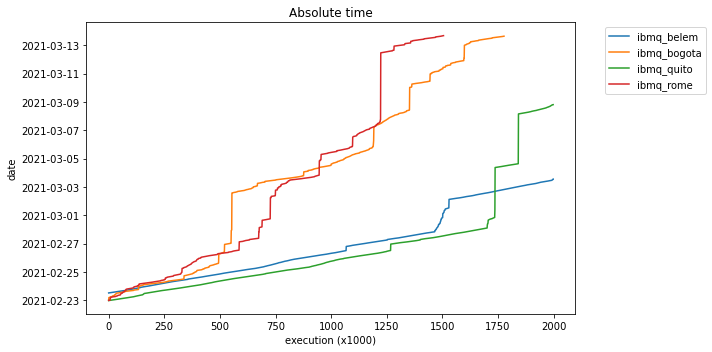

In [5]:
for m in machines:
    plt.plot(dates[m], label=m)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.title("Absolute time")
plt.xlabel("execution (x1000)")
plt.ylabel("date")
plt.draw()
plt.savefig("/tmp/absolute.pdf")

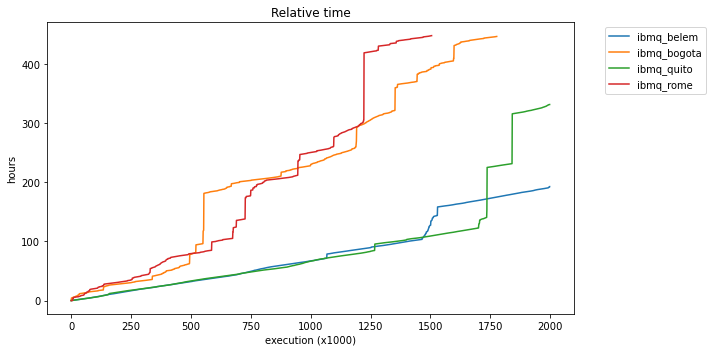

In [6]:
for m in machines:
    plt.plot(relative[m], label=m)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.title("Relative time")
plt.xlabel("execution (x1000)")
plt.ylabel("hours")
plt.draw()
plt.savefig("/tmp/relative.pdf")

In [7]:
minDate = min([min(dates[m]) for m in machines])
for m in machines:
    with open("/tmp/datapoints-{}.dat".format(m), 'wt') as f:
        for e,d in enumerate(dates[m]):
            f.write("{} {}\n".format(e,(d - minDate).total_seconds()/60./60.))

In [13]:
for m in machines:
    print("{}: {}".format(m,len(dates[m])))

ibmq_belem: 1999
ibmq_bogota: 1778
ibmq_quito: 1999
ibmq_rome: 1506
